## 파이썬 버전

In [1]:
import platform

platform.python_version()

'3.11.3'


## 프로세스와 스레드 

- 모두 병행성(Concurrency)을 구현하기 위한 개념이지만, 각각의 특징과 용도에는 몇 가지 중요한 차이점이 있습니다.

### 프로세스(Process):

- 운영체제에서 실행 중인 프로그램으로, 독립적인 메모리 공간을 가집니다.
- 각 프로세스는 자신만의 주소 공간을 가지며, 프로세스 간 데이터 공유는 별도의 메커니즘(Inter Process Communication, IPC)을 사용해야 합니다.
- 프로세스 간 통신은 비용이 높고 복잡합니다.
- 각 프로세스는 최소 하나의 스레드를 가집니다(주로 메인 스레드).
- 프로세스 간 독립적인 실행 환경을 제공하므로 안정성이 높습니다.


### 스레드(Thread):

- 프로세스 내에서 실행되는 실행 단위로, 프로세스의 주소 공간을 공유합니다.
- 스레드는 프로세스 내의 자원을 공유하며, 스레드 간 통신은 변수를 공유하거나 동기화 메커니즘을 사용하여 이루어집니다.
- 스레드 간 통신은 비교적 저렴하고 간단합니다.
- 여러 스레드가 동시에 실행될 수 있기 때문에 주의가 필요하며, 공유 자원에 대한 동기화 문제가 발생할 수 있습니다.


In [21]:
from IPython.display import Image

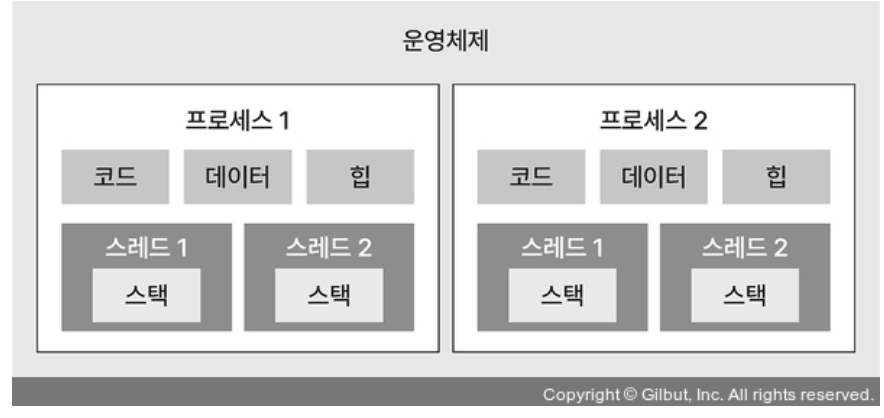

In [22]:
Image("./image/프로세스_스레드.png")

### 프로세스와 스레드의 주요 차이점은 
- 프로세스는 독립적인 메모리 공간을 가지고 실행되는 반면, 
- 스레드는 같은 프로세스 내에서 실행되면서 메모리 공간을 공유한다는 점입니다. 
- 프로세스 간 통신이 필요한 경우에는 프로세스를 사용하고, 
- 프로세스 내에서 작은 작업을 분리하거나 동시에 실행해야 할 때는 스레드를 사용하는 것이 일반적입니다.

## 1. 스레드 처리하기 

- 파이썬에서 스레드를 사용하여 간단한 동시성 처리를 구현하는 예제를 제공합니다. 
- 스레드는 파이썬의 threading 모듈을 통해 사용할 수 있습니다.

### 스레드란
- , 스레드는 하나의 프로세스 내에서 실행되는 경량의 실행 단위이며, 프로세스는 독립적인 메모리 공간을 가지고 실행되는 독립적인 실행 단위입니다.

## 단일 처리 

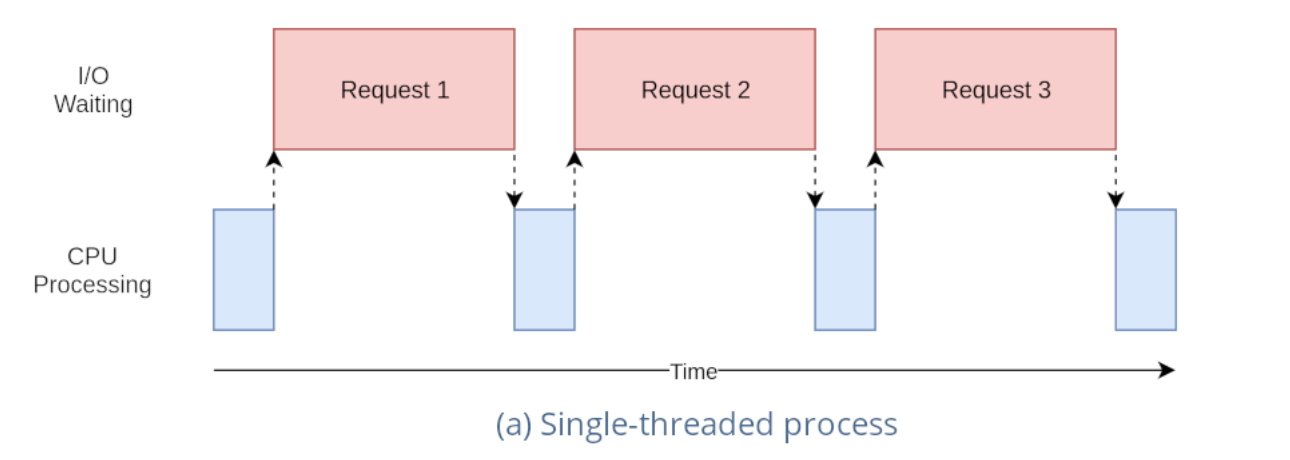

In [24]:
Image("./image/싱글스레드.png")

## 동시성 처리 

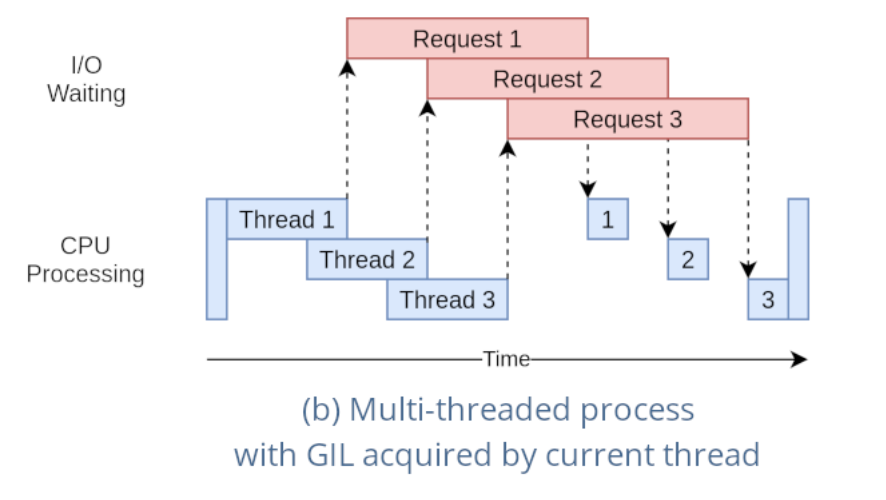

In [25]:
Image("./image/멀티스레드.png")

## 동시성 코루틴 처리 

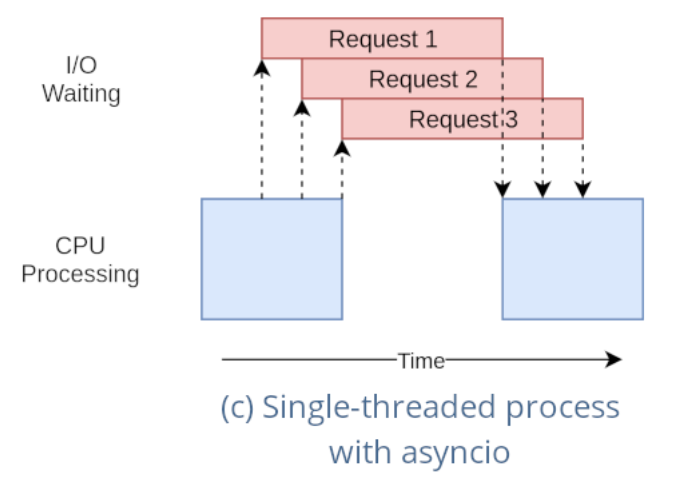

In [26]:
Image("./image/코루틴스레드.png")

## 필요한 모듈 import 하기

In [2]:
import threading
import time
import random
import sys
import multiprocessing

## 1-1. 스레딩 모듈 내부 확인 

In [3]:
for i in dir(threading) :
    if not i.startswith("_") : 
        print(i, end=", ")

Barrier, BoundedSemaphore, BrokenBarrierError, Condition, Event, ExceptHookArgs, Lock, RLock, Semaphore, TIMEOUT_MAX, Thread, ThreadError, Timer, WeakSet, activeCount, active_count, currentThread, current_thread, enumerate, excepthook, functools, get_ident, get_native_id, getprofile, gettrace, local, main_thread, setprofile, settrace, stack_size, 

## 1-2 클래스 정보 확인 

### 1-2-1 스레드 객체를 생성하는 클래스 

- Python에서 threading 모듈을 사용하여 스레드를 생성하는 데에는 Thread 클래스를 사용합니다.
- 이 클래스를 사용하여 스레드를 생성하고 실행할 수 있습니다. 
- 각 스레드는 독립적으로 실행되는 작업을 수행할 수 있습니다.

In [86]:
threading.Thread

threading.Thread

In [87]:
print(type(threading.Thread))

<class 'type'>


###  1-2-2 스레드의 락을 처리하는 함수 


#### Lock:

- 기본적인 스레드 동기화 메커니즘입니다.
- 하나의 스레드가 자원을 소유하고 있을 때 다른 스레드는 해당 자원을 얻을 수 없습니다.
- 동일한 스레드가 여러 번 lock()을 호출하면 데드락이 발생합니다.

In [70]:
threading.Lock

<function _thread.allocate_lock>

#### RLock (Reentrant Lock):

- 재진입이 가능한 락입니다.
- 동일한 스레드가 여러 번 acquire()를 호출해도 데드락이 발생하지 않습니다. 
- 스레드가 락을 여러 번 잠금할 수 있습니다. 
- 각 acquire() 호출은 해당 release() 호출만큼 해제되어야 합니다.
- RLock은 서브클래스가 아니므로 상속하지 않습니다.

In [71]:
threading.RLock

<function threading.RLock(*args, **kwargs)>

### 1-2-3 스레드 동기화하는 클래스들 

### threading.Condition:

- 스레드 간에 특정 조건이 충족될 때까지 대기하고, 다른 스레드가 이를 신호할 수 있는 동기화 기능을 제공합니다.
- 주로 프로듀서-컨슈머 문제와 같이 작업을 조정하는 데 사용됩니다.
- acquire() 및 release() 메서드를 사용하여 락을 얻고 해제합니다.
- wait(), notify(), notify_all() 메서드를 사용하여 대기하고 있는 스레드를 깨우거나, 모든 스레드에게 신호를 보낼 수 있습니다.

In [72]:
threading.Condition

threading.Condition

### threading.Semaphore:

- 공유 자원에 대한 동시 접근을 제한하는 동기화 기법입니다.
- 고정된 개수의 허용 가능한 동시 접근을 관리합니다.
- acquire() 메서드로 세마포어를 획득하고, release() 메서드로 세마포어를 해제합니다.
- 세마포어의 개수가 0보다 큰 경우에만 acquire()가 성공하며, 그렇지 않으면 블록됩니다.

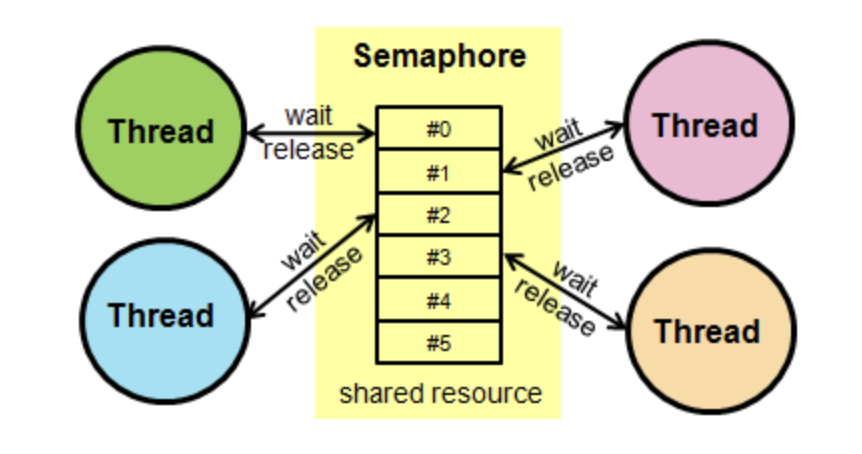

In [27]:
Image("./image/세마포어.png")

In [73]:
threading.Semaphore

threading.Semaphore

### threading.Barrier:

- 고정된 개수의 스레드가 동시에 특정 지점까지 도달할 때까지 다른 스레드를 대기시키는 동기화 도구입니다.
- 모든 스레드가 특정 지점에 도달할 때까지 모든 스레드를 블록합니다.
- 모든 스레드가 도착하면 모든 스레드를 동시에 해제합니다.
- 주로 병렬 처리 작업에서 동기화된 시작점을 제공하는 데 사용됩니다.

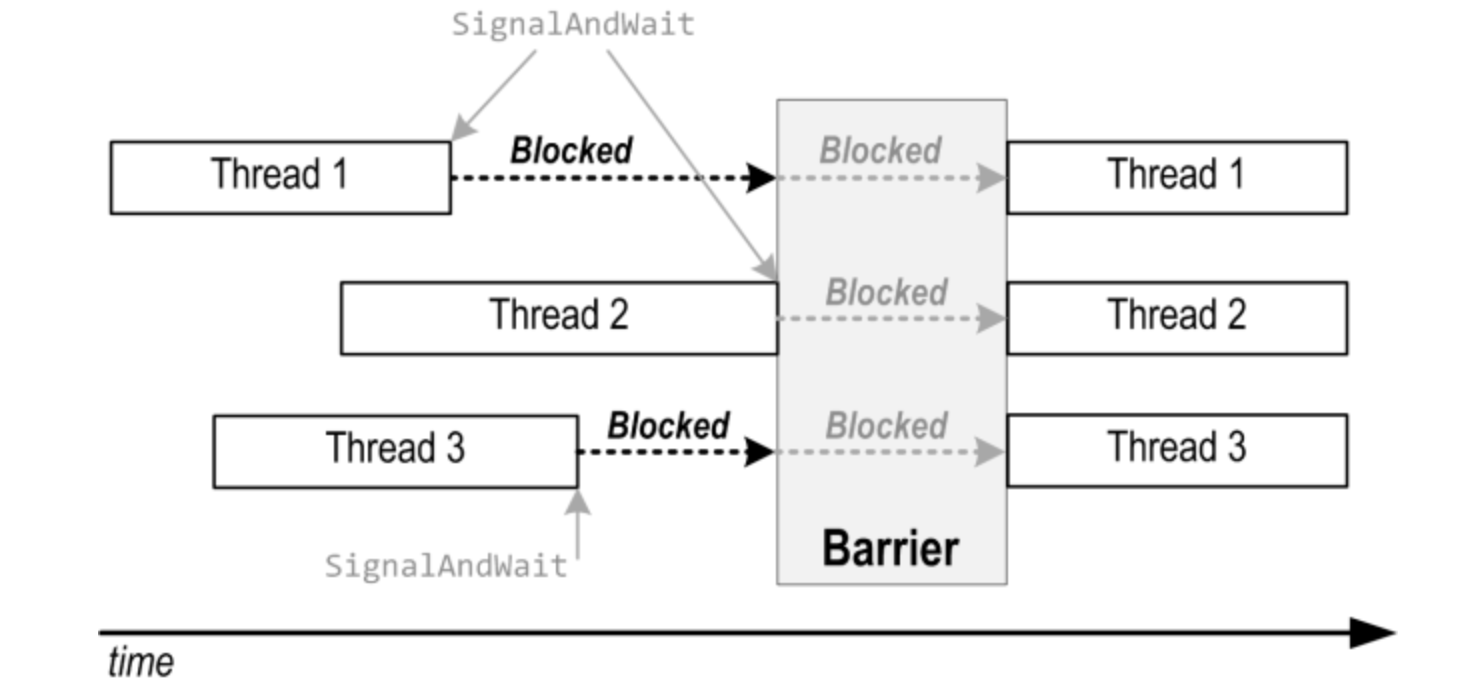

In [28]:
Image("./image/배리어락.png")

In [85]:
threading.Barrier

threading.Barrier

##  1-3. 스레드 정보 확인 함수 및 속성 확인   

### 메인스레드 확인 

In [8]:
threading.main_thread()

<_MainThread(MainThread, started 7978636032)>

### 현재 스레드의 이름 확인 

In [17]:

current_thread = threading.current_thread()
print(f"Current Thread: {current_thread.name}")


Current Thread: MainThread


### 스레드 상태

- 현제 스레드의 상태 확인 

In [25]:
print(f"Current Thread status : {current_thread.is_alive()}")

Current Thread status : True


###  데몬 스레드 여부 확인 

- 데몬 스레드 여부 확인 

In [27]:
print(f"Current Thread status : {current_thread.daemon}")

Current Thread status : False


###  현재 스레드 갯수 및 현재 스레드 모록 

In [4]:
threading.active_count()

8

In [5]:
threading.enumerate()

[<_MainThread(MainThread, started 7978636032)>,
 <Thread(IOPub, started daemon 6108377088)>,
 <Heartbeat(Heartbeat, started daemon 6125203456)>,
 <Thread(Thread-3 (_watch_pipe_fd), started daemon 6143176704)>,
 <Thread(Thread-4 (_watch_pipe_fd), started daemon 6160003072)>,
 <ControlThread(Control, started daemon 10888441856)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 10905268224)>,
 <ParentPollerUnix(Thread-2, started daemon 10922094592)>]

In [6]:
len(threading.enumerate())

8

## 2 GIL 확인하기 

- GIL(Global Interpreter Lock)은 CPython (CPython은 파이썬의 표준 구현체 중 하나)에서 사용되는 메커니즘
- 한 번에 하나의 스레드만 파이썬 바이트코드를 실행할 수 있게 합니다. 
- 이로 인해 멀티코어 CPU에서 병렬로 실행되는 것이 제한되고, CPU 바운드 작업에서는 성능 향상이 제한될 수 있습니다.

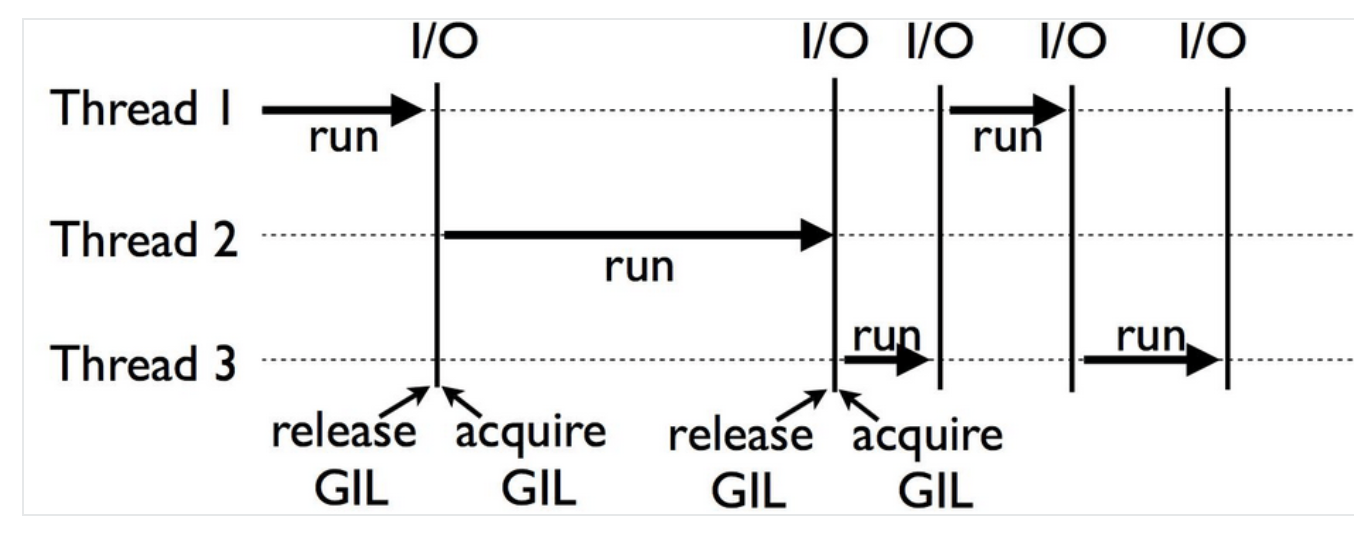

In [29]:
Image("./image/글로벌락.png")

## 2-1 스레드 처리 확인하기 : 단일 스레드

### 스레드 처리 함수 정의 

In [11]:
# 전역변수 정의 
counter_value = 0
limit_value = 1000000

# 함수를 정의하기 
def count_up(counter, limit):
    print("count up :", threading.current_thread().name)
    print()
    while counter < limit:
        counter += 1
        
    print(f"count : {counter}")

### 함수를 바로 실행 : 단일 스레드 처리

- 현재 실행된 결과를 그대로 출력
- 매개변수는 지역변수라서 갱신이되어도 전역변수는 변하지 않는다

In [12]:
# 단일 스레드에서 작업 수행
count_up(counter_value, limit_value)
print("Single-threaded result:", counter_value)

count up : MainThread

count : 1000000
Single-threaded result: 0


## 2-2 스레드 처리 확인하기 : 멀티 스레드

### 멀티스페드에서 gil 작동확인  => 하나의 스레드부터 순차적으로 처리

- 두 개의 스레드로 처리
- 스레드 가동은 start 메서도를 실행
- 그러면 내부의 run 메서드가 실행 
- 스레드의 join 메서드가 작동되면 끝날때까지 기다린다. 



In [13]:
# 멀티스레딩에서 작업 수행
counter_value = 0
thread1 = threading.Thread(target=count_up, args=(counter_value, limit_value // 2))
thread2 = threading.Thread(target=count_up, args=(counter_value, limit_value // 2))

# 스레드 시작
thread1.start()
thread2.start()

# 스레드 대기 및 종료 
thread1.join()
thread2.join()

print("Multi-threaded result:", counter_value)

# 현재 GIL 상태 확인
gil_enabled = sys.getswitchinterval() > 0
print(f"GIL is {'enabled' if gil_enabled else 'disabled'}")


count up :count up : Thread-6 (count_up)

count : 500000
 Thread-5 (count_up)

count : 500000
Multi-threaded result: 0
GIL is enabled


## 2-3  스레드 클래스로 스레드  정의

-  스레드 클래스를 상속 받아서 클래스 정의
-  클래스에 정의되는 것을 스레드를 실제 실행하는 run 메서드를 구현함 으로

### 스레드 클래스를 정의 

-  생성자는 상위 스레드의 생성자를 호출한다.
- 클래스 내부에 run 메서드를 정의해서 실행되도록 구현한다 

In [4]:
class myWorkerThread(threading.Thread) :
    def __init__(self) :
        print(" Hello Thread ")
        threading.Thread.__init__(self)
        
    def run(self) :                        # 스레드 start 메서드 호출되면 실행될 메서드 정의 
        print("Thread is now running")

### 클래스 객체를 생성

- 스레드를 사용하기 위해서 객체를 생성한다. 

In [5]:
myThread = myWorkerThread()

 Hello Thread 


### 스레드를 실행과 종료 

- 실제 스레드를 start로 실행하고 join으로 결과를 받고 스레드를 종료한다 

In [6]:
myThread.start()
myThread.join()

Thread is now running


## 3.  스레드 내의 특정 정보 처리 

- 생성자에 스레드 정보를 추가한다

## 3-1 사용자 스레드 만들기     

- 스레드 클래스 정의 및 스레드 생성자에 스레드 정보를 지정해서 사용할 수 있다.
- 반드시 run 메서드를 작성해서 스레드에서 작성할 메서드를 구현한다.

### 스레드 클래스 정의

- 필요정보를 생성자에 만듬
- 스레드 실행하는 메서드인 run 메서드를 정의 

In [91]:
class MyThread1(threading.Thread):
    def __init__(self, thread_id, name):
        # 상속한 스레드 클래스의 생성자를 호출한다. 
        threading.Thread.__init__(self)
        # 추가적인 스레드 정보를 세팅
        self.thread_id = thread_id
        self.name = name

    # 스레드 객체가 실행할 run 메서드를 정의 
    def run(self):
        print(f"Thread {self.thread_id} ({self.name}) is running")
        time.sleep(3)
        print(f"Thread {self.thread_id} ({self.name}) completed")
        print()


### 스레드 객체를 생성하고 실행하기

In [92]:
# 스레드 인스턴스 생성
thread1 = MyThread1(thread_id=1, name="Thread 1")
thread2 = MyThread1(thread_id=2, name="Thread 2")

# 스레드 시작
thread1.start()
thread2.start()

# 메인 스레드에서도 일부 작업을 수행할 수 있음
print("Main thread is running")

# 각 스레드가 완료될 때까지 대기
thread1.join()
thread2.join()

print("All threads are completed")


Thread 1 (Thread 1) is running
Thread 2 (Thread 2) is running
Main thread is running
Thread 2 (Thread 2) completed

Thread 1 (Thread 1) completed

All threads are completed


## 4. 데몬 스레드 

- 데몬 스레드란 종료점이 정의되지 않은 실질적인 스레드이다. 이는 프로그램이 종료될때까지 계속 작동한다.
- 데몬 스레드는 프로그램의 백그라운드에 위치해 주기적으로 변경없이 갱신 값을 전달하면서 인스턴스가 종료되는 것을 걱정할 필요없이 관리 

## 4-1.  데몬 스레드 처리하기

-  스레드에 daemon 속성을 True 세팅해서 처리

### 스레드에서 작동할 함수 정의 

In [33]:
# 일반스레드 처리용 함수 
def worker_function(name):
    for _ in range(3):
        print(f"Worker {name} is working")
        time.sleep(1)
    print(f"Worker {name} completed")
    print()

## 데몬스레드 처리용 함수 
def worker_function2(name):
    for _ in range(10):
        print(f"Worker {name} is working")
        time.sleep(1)
    print(f"Worker {name} completed")
    print()

### 스레드 실행할 함수 정의  

- 스레드를 데몬으로 지정하기 

In [34]:
def main():
    # 스레드 생성
    thread1 = threading.Thread(target=worker_function2, args=("A",))
    thread2 = threading.Thread(target=worker_function, args=("B",))

    # 데몬 스레드 설정 (메인 스레드가 종료되면 함께 종료됨)
    thread1.daemon = True     # 변수할당방식만 사용됨 
    #thread2.setDaemon(True)   # 사용 종료됨

    # 스레드 시작
    thread1.start()
    thread2.start()

    # 스레드가 완료될 때까지 대기
    thread1.join()
    thread2.join()

    print("All threads are completed")


### 스레드 실행 

In [35]:
if __name__ == "__main__":
    # 현재 스레드 정보 얻기
    current_thread = threading.current_thread()
    print(f"Current thread name: {current_thread.name}")

    # 현재 활성화된 스레드 개수 얻기
    active_threads = threading.active_count()
    print(f"Active threads: {active_threads}")

    # 메인 함수 실행
    main()


Current thread name: MainThread
Active threads: 9
Worker A is working
Worker B is working
Worker A is workingWorker B is working

Worker B is working
Worker A is working
Worker B completedWorker A is working


Worker A is working
Worker A is working
Worker A is working
Worker A is working
Worker A is working
Worker A is working
Worker A completed

All threads are completed


##  4-2  데몬스레드와 일반 스레드 처리 차이점 

#### 데몬 스레드와 일반 스레드 간의 주요 차이점

- 데몬 스레드가 메인 스레드가 종료될 때 함께 종료되는 것입니다. 
- 이를테면, 프로그램이 모든 일반 스레드의 작업을 완료하고 메인 스레드가 종료되더라도, 데몬 스레드는 메인 스레드가 종료될 때 함께 강제 종료됩니다.
-  데몬 스레드가 메인 스레드와 독립적으로 실행되는 동안, 일반 스레드는 메인 스레드에 종속되어 있어 메인 스레드가 종료되더라도 계속 실행될 수 있습니다.

### 스레드에서 실행할 함수 정의 

In [36]:
def daemon_thread():
    while True:                            ## 무한순환을 실행 중이라서 현재 작동하는 것이 계속 실행할 수 있음 
        print("Daemon thread is running")
        time.sleep(1)

def non_daemon_thread():
    for _ in range(5):
        print("Non-daemon thread is working")
        time.sleep(1)
    print("Non-daemon thread completed")

### 스레드 실행 

In [37]:
%%writefile demon.py

import threading
import time

def daemon_thread():
    while True:
        print("Daemon thread is running")
        time.sleep(1)

def non_daemon_thread():
    for _ in range(5):
        print("Non-daemon thread is working")
        time.sleep(1)
    print("Non-daemon thread completed")

if __name__ == "__main__":
    # 데몬 스레드 생성
    daemon_thread = threading.Thread(target=daemon_thread)
    daemon_thread.daemon = True  # 데몬 스레드로 설정

    # 일반 스레드 생성
    non_daemon_thread = threading.Thread(target=non_daemon_thread)

    # 스레드 시작
    daemon_thread.start()
    non_daemon_thread.start()

    try:
        # 모든 스레드가 완료될 때까지 대기
        non_daemon_thread.join()
        daemon_thread.join()
    except KeyboardInterrupt:
        # Ctrl+C 등의 인터럽트 시그널이 발생하면 프로그램 종료
        pass

    print("Main thread completed")


Overwriting demon.py


### 무한순환중에는 강제로 종료시킴 

- 데몬 스레드는 프로그램이 메인 스레드를 포함하여 모든 일반 스레드의 실행이 완료되면 자동으로 종료됩니다. 

#### 그러나 주의해야 할 중요한 점이 있습니다. 

- 프로그램이 메인 스레드가 종료될 때 모든 일반 스레드의 실행이 완료되지 않았다면, 데몬 스레드가 강제 종료될 수 있습니다.

In [38]:
%run demon.py

Daemon thread is running
Non-daemon thread is working
Daemon thread is runningNon-daemon thread is working

Non-daemon thread is working
Daemon thread is running
Non-daemon thread is workingDaemon thread is running

Non-daemon thread is working
Daemon thread is running
Non-daemon thread completedDaemon thread is running

Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Da

### 위의 코드에서  데몬 스레드를 강제로 종료 처리하기

- 프로그램이 메인 스레드를 포함하여 모든 일반 스레드의 실행이 완료되면 자동으로 종료되어야 합니다. 
- 그러나 위의 코드에서는 daemon_thread 함수가 무한 루프를 갖고 있어서 종료되지 않는 문제가 발생할 수 있습니다.
- 데몬 스레드를 정상적으로 종료하려면 해당 스레드에서 실행되는 루프나 작업이 종료될 수 있도록 설계해야 합니다. 
- 루프나 작업을 완료하면 데몬 스레드는 자동으로 종료됩니다.

In [39]:


def daemon_thread2(stop_event):
    while not stop_event.is_set():
        print("Daemon thread is running")
        time.sleep(1)

def non_daemon_thread2():
    for _ in range(5):
        print("Non-daemon thread is working")
        time.sleep(1)
    print("Non-daemon thread completed")

if __name__ == "__main__":
    # 이벤트 생성
    stop_event = threading.Event()

    # 데몬 스레드 생성
    daemon_thread = threading.Thread(target=daemon_thread2, args=(stop_event,))
    daemon_thread.daemon = True  # 데몬 스레드로 설정

    # 일반 스레드 생성
    non_daemon_thread = threading.Thread(target=non_daemon_thread2)

    # 스레드 시작
    daemon_thread.start()
    non_daemon_thread.start()

    try:
        # 모든 스레드가 완료될 때까지 대기
        non_daemon_thread.join()
        stop_event.set()                # 데몬 스레드 종료를 위해 이벤트 설정
        daemon_thread.join()
    except KeyboardInterrupt:
        # Ctrl+C 등의 인터럽트 시그널이 발생하면 프로그램 종료
        pass

    print("Main thread completed")


Daemon thread is running
Non-daemon thread is working
Daemon thread is running
Daemon thread is running
Non-daemon thread is working
Daemon thread is running
Daemon thread is runningNon-daemon thread is working

Daemon thread is running
Daemon thread is runningNon-daemon thread is working

Daemon thread is running
Daemon thread is running
Non-daemon thread is working
Daemon thread is running
Daemon thread is running
Non-daemon thread completed
Daemon thread is running
Main thread completed
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemo

## 5. 프로세스와 스레드 이해하기

## 5-1 스레드 처리하기 

In [61]:
def mytask() :
    print("Starting==>")
    time.sleep(2)
    
    
t0 = time.time()
threads = []

for i in range(10) :
    thread = threading.Thread(target=mytask)
    thread.start()
    threads.append(thread)   # 리스트에 스레드 넣기
    
t1 = time.time()
print(f"Total time for creating 10 Threads { t1 - t0}")

for thread in threads :
    thread.join()

Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Total time for creating 10 Threads 0.003905057907104492


## 5-2 . 프로세스 처리 하기 

- 주피터 노트북에서 실행 할 때는 두 개의 절차가 분리 


In [40]:
%%writefile mytask_.py 
import time

def mytask() :
    print("Starting==>")
    time.sleep(2)

Overwriting mytask_.py
Daemon thread is running


In [43]:
import mytask_

if __name__ == "__main__":

    t2 = time.time()

    procs = []

    for i in range(10) :
        process = multiprocessing.Process(target=mytask_.mytask)
        process.start()
        procs.append(process)
        
    t3 = time.time()
    print(f"Total time for creating 10 processess : {t3-t2}")
    for proc in procs :
        proc.join()

Total time for creating 10 processess : 0.0616152286529541Daemon thread is running

Daemon thread is running
Daemon thread is running
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running
Daemon thread is running


## 5-3 프로세스를 하나의 파일에서 처리함

-  메인에서 실제 로직을 실행함 

In [1]:
%%writefile mytask_run.py 

import time
import multiprocessing

def mytask() :
    print("Starting==>")
    time.sleep(2)
    

if __name__ == '__main__':
    t2 = time.time()

    procs = []

    for i in range(10) :
        process = multiprocessing.Process(target=mytask)
        process.start()
        procs.append(process)
        
    t3 = time.time()
    print(f"Total time for creating 10 processess : {t3-t2}")
    for proc in procs :
        proc.join()

Overwriting mytask_run.py


In [3]:
!python mytask_run.py

Total time for creating 10 processess : 0.03172922134399414
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
Starting==>
